In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Here if we have customize NaN values then it can be converted into NaN values by adding na_values argument, while loading the CSV file.

In [4]:
# loading the dataset
na_vals = ['NA','Missing']
df = pd.read_csv("C:/Users/dines/pandas_Demo/developer_survey_2019/survey_results_public.csv",index_col = 'Respondent',na_values = na_vals)
schema_df = pd.read_csv('C:/Users/dines/pandas_Demo/developer_survey_2019/survey_results_schema.csv',index_col = 'Column')

In [5]:
# knowing the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null

In [6]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

checking whether python is their language or not.

In [7]:
fil_tr = df['LanguageWorkedWith'].str.contains('Python',na = False)
df.loc[fil_tr , 'LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
8        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
84539    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
85738      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
86566      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
87739             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88212                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

In [8]:
# total social media platform
df['SocialMedia'].unique()

array(['Twitter', 'Instagram', 'Reddit', 'Facebook', 'YouTube', nan,
       'VK ВКонта́кте', 'WhatsApp', "I don't use social media",
       'WeChat 微信', 'LinkedIn', 'Snapchat', 'Weibo 新浪微博', 'Hello',
       'Youku Tudou 优酷'], dtype=object)

In [11]:
# top 8 social media
soci_label = soci.loc[:,'SocialMedia'].value_counts().index
soci_label = soci_label[:8]
soci = df.loc[df['SocialMedia'].notnull()]
social_data = np.array(soci.loc[:,'SocialMedia'].value_counts().nlargest(8))


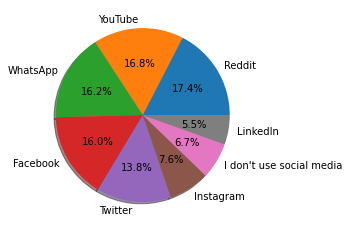

In [12]:
# Pie chart -- 8 popular social media plateform
plt.pie(social_data , labels = soci_label,autopct='%1.1f%%',shadow=True)
plt.show()

In [14]:
# diff. social media on country-wise
country_grp = df.groupby(['Country'])
pd.set_option('display.max_rows',200)
cou_soci = country_grp['SocialMedia'].value_counts().head(200)
cou_soci

Country                 SocialMedia             
Afghanistan             Facebook                     15
                        YouTube                       9
                        I don't use social media      6
                        WhatsApp                      4
                        Instagram                     1
                        LinkedIn                      1
                        Twitter                       1
Albania                 WhatsApp                     18
                        Facebook                     16
                        Instagram                    13
                        YouTube                      10
                        Twitter                       8
                        LinkedIn                      7
                        Reddit                        6
                        I don't use social media      4
                        Snapchat                      1
                        WeChat 微信                     1

In [15]:
# country-wise avg salary and median.
country_grp['ConvertedComp'].agg(['median','mean'])

,median,mean
Country,,
Afghanistan,6222.0,101953.333333
Albania,10818.0,21833.700000
Algeria,7878.0,34924.047619
Andorra,160931.0,160931.000000
Angola,7764.0,7764.000000
Antigua and Barbuda,NaN,NaN
Argentina,17760.0,29467.265306
Armenia,19692.0,24691.733333
Australia,79783.0,171541.116279


In [17]:
# people who knew python by country.
num_python = country_grp['LanguageWorkedWith'].apply(lambda x:x.str.contains('Python').sum())
num_python

Country
Afghanistan                                      8
Albania                                         23
Algeria                                         40
Andorra                                          0
Angola                                           2
Antigua and Barbuda                              0
Argentina                                      191
Armenia                                         28
Australia                                      790
Austria                                        338
Azerbaijan                                      17
Bahamas                                          2
Bahrain                                          4
Bangladesh                                     204
Barbados                                         1
Belarus                                         69
Belgium                                        296
Belize                                           1
Benin                                            3
Bhutan                 

In [18]:
# country-wise entries(number)
num_country = df['Country'].value_counts().sort_index()
num_country

Afghanistan                                     44
Albania                                         86
Algeria                                        134
Andorra                                          7
Angola                                           5
Antigua and Barbuda                              9
Argentina                                      553
Armenia                                         86
Australia                                     1903
Austria                                        839
Azerbaijan                                      49
Bahamas                                          3
Bahrain                                         18
Bangladesh                                     605
Barbados                                         3
Belarus                                        202
Belgium                                        727
Belize                                           3
Benin                                            5
Bhutan                         

In [20]:
# calculating % of developer who use/ know python
df3= pd.concat([num_python,num_country],axis='columns',sort = True)
df3['PctKnowsPython'] = df3['LanguageWorkedWith']/df3['Country']*100
df3.rename(columns={'LanguageWorkedWith':'Num_knows_python','Country':'Num_Respondents'},inplace = True)
df3.sort_values(by='PctKnowsPython',ascending = False)



,Num_knows_python,Num_Respondents,PctKnowsPython
Dominica,1,1,100.000000
Niger,1,1,100.000000
Timor-Leste,1,1,100.000000
Sao Tome and Principe,1,1,100.000000
Turkmenistan,6,7,85.714286
Mauritania,5,7,71.428571
Bahamas,2,3,66.666667
Guinea,2,3,66.666667
Guyana,2,3,66.666667
Uganda,47,72,65.277778
